In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [5]:
filePath = "./outputGainSettings/"
settingsByCalo = [[ [] for k in range(54) ] for i in range(24)]
settings = []

#fin2 = filePath+"calo_settings_run27921.json"
#fin2 = filePath+"calo_run27976.json" #iteration 5
fin2 = filePath+"calo_run28020.json" #iteration 5

with open(fin2) as input_file:
    for i, line in enumerate(input_file):
        if("calo" in line):
            #print(line)
            calo = int(line.split("calo")[1].split('"')[0])
            #print(calo)
        if("sipm" in line):
            sipm = int(line.split('"')[1].split("sipm")[1])
            gain = int(line.split(" ")[9].split("gain:")[1].split(",")[0])
            #if(gain == 20 or gain == 80):
            #    print("****************")
            #    print(calo , sipm, gain, voltage, board, port)
            #    print()
                
            voltage = float(line.split(" ")[10].split(":")[1].split(",")[0])
            board = int(line.split(" ")[11].split(":")[1].split(",")[0])
            port = int(line.split(" ")[12].split(":")[1].split(" ")[0])
            settingsi = [calo, sipm, gain, voltage, board, port]
            
            settingsByCalo[calo - 1][sipm] = settingsi
            settings.append( settingsi )

In [6]:
print(len(settingsByCalo))

24


In [10]:
df = pandas.DataFrame(settings,columns=["calo","sipm","gain","voltage","board","port"])
df.head()

,calo,sipm,gain,voltage,board,port
0,1,17,47,68.0,1,13
1,1,2,57,68.2,3,9
2,1,46,76,68.2,3,10
3,1,33,52,68.2,4,15
4,1,50,61,68.2,4,10


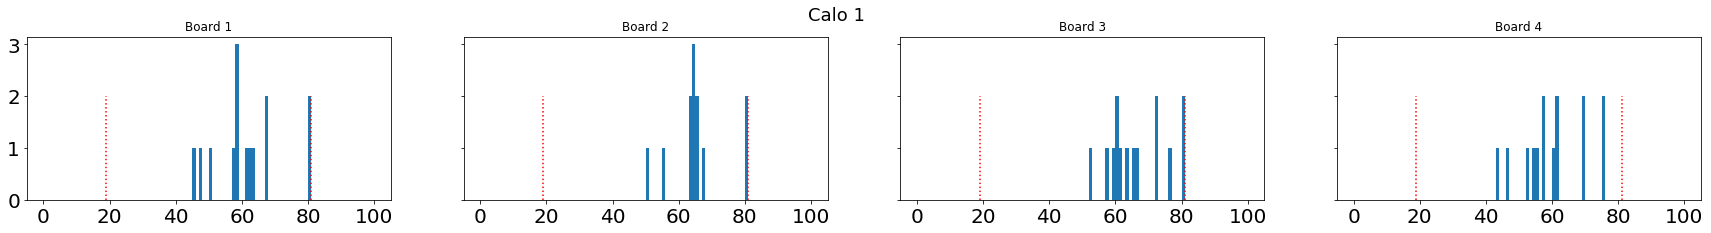

In [30]:
calo = 1
fig,ax = plt.subplots(1,4, figsize=(30,3),sharex=True,sharey=True)
plt.suptitle("Calo "+str(calo), y=1.02, fontsize=18)
for board in range(1,5):
    dfi = df.loc[df["board"] == board].loc[df['calo'] == calo]
    axi = ax[board - 1]
    axi.plot([19,19],[0,2],"r:")
    axi.plot([81,81],[0,2],"r:")
    axi.hist(dfi['gain'],bins=100, range=(0,100))
    axi.set_title("Board "+str(board))
plt.show()

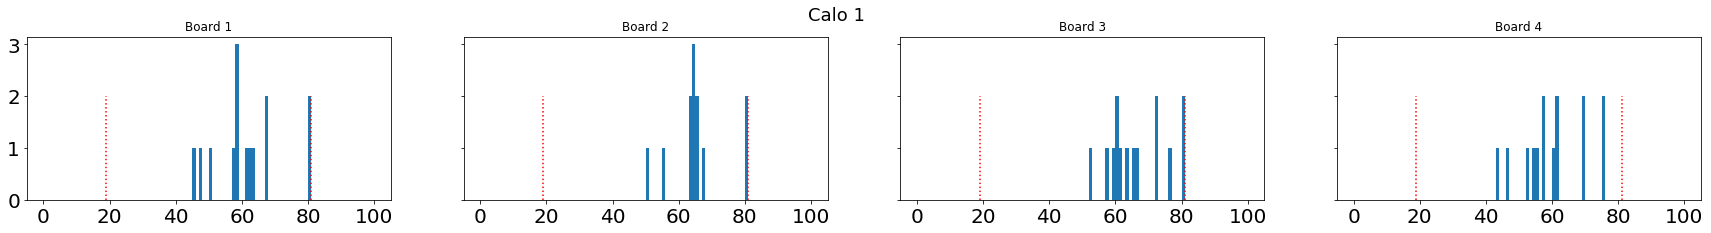

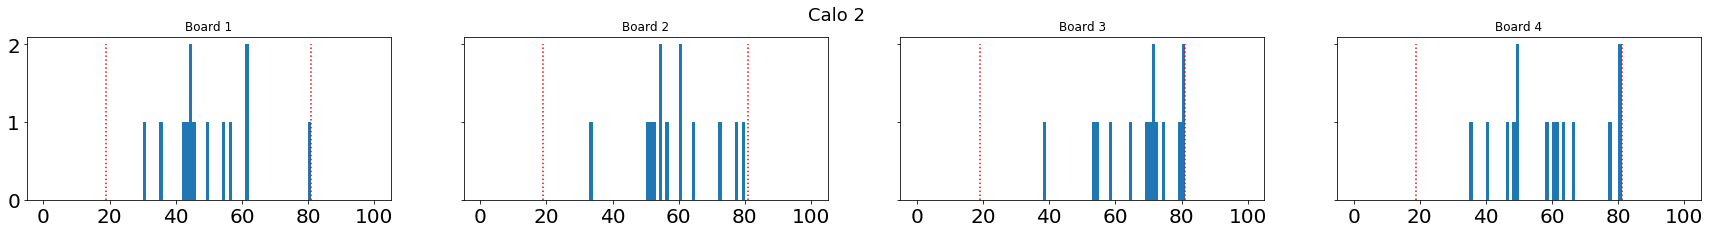

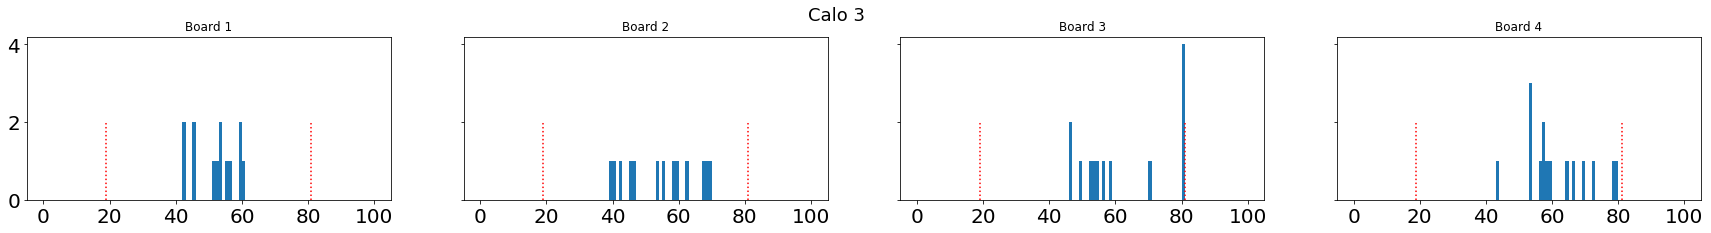

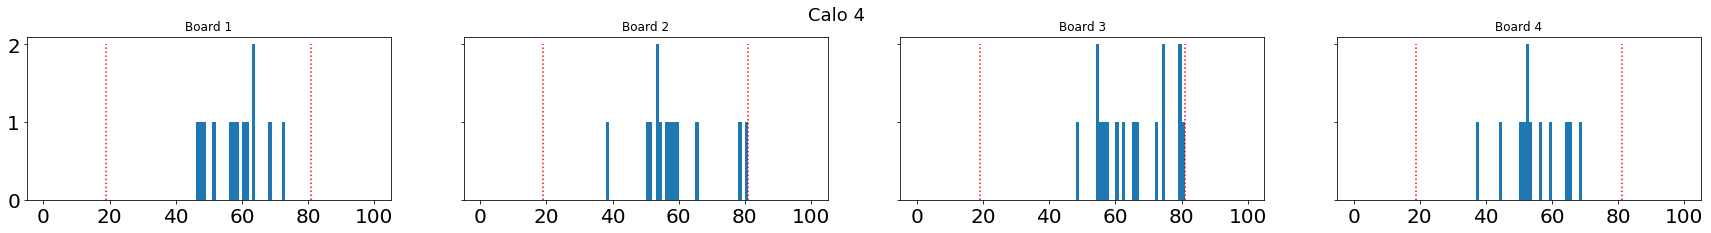

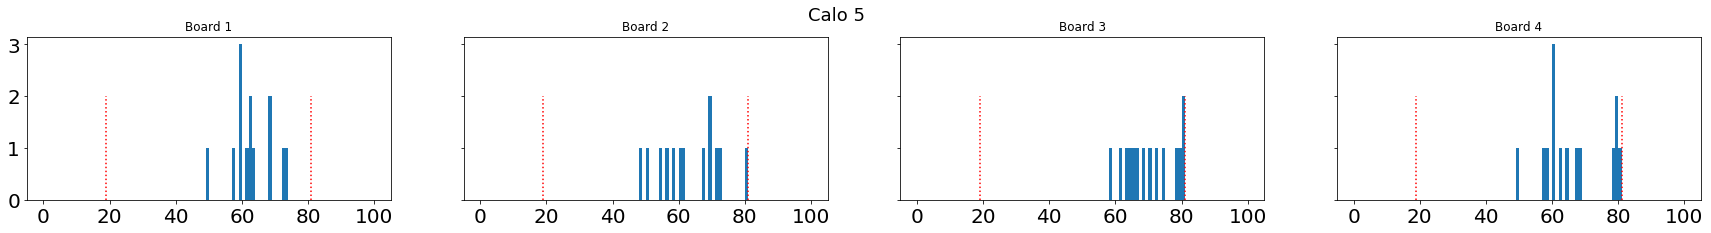

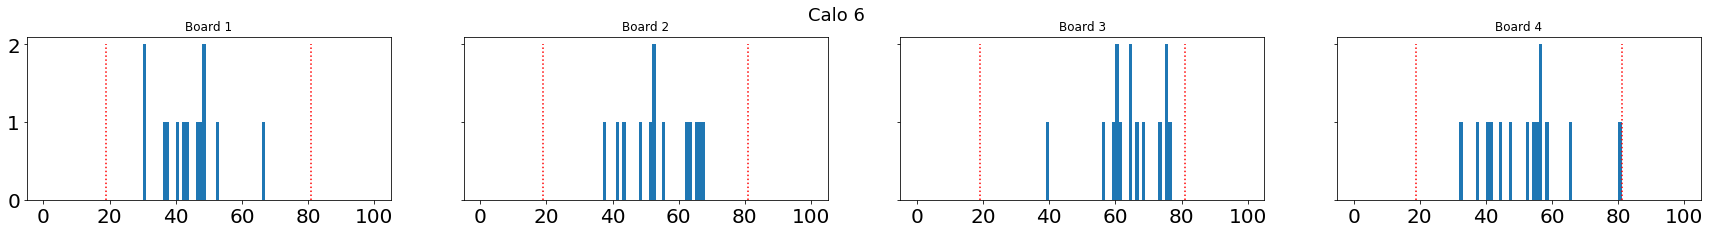

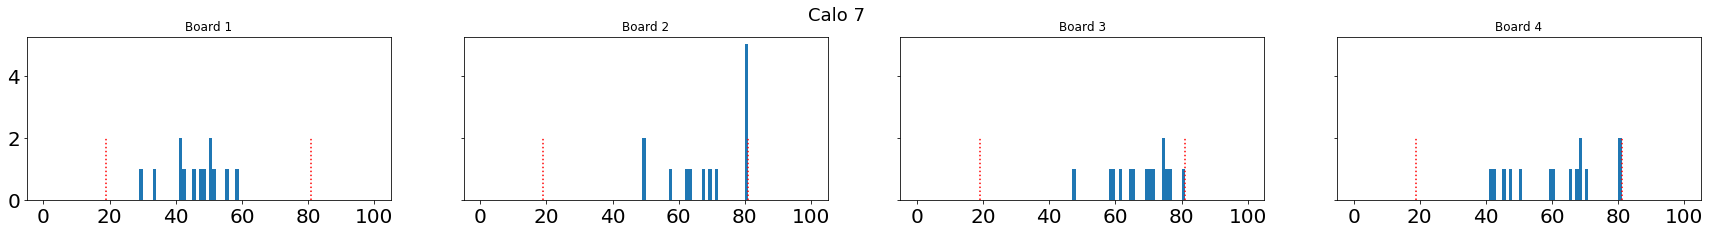

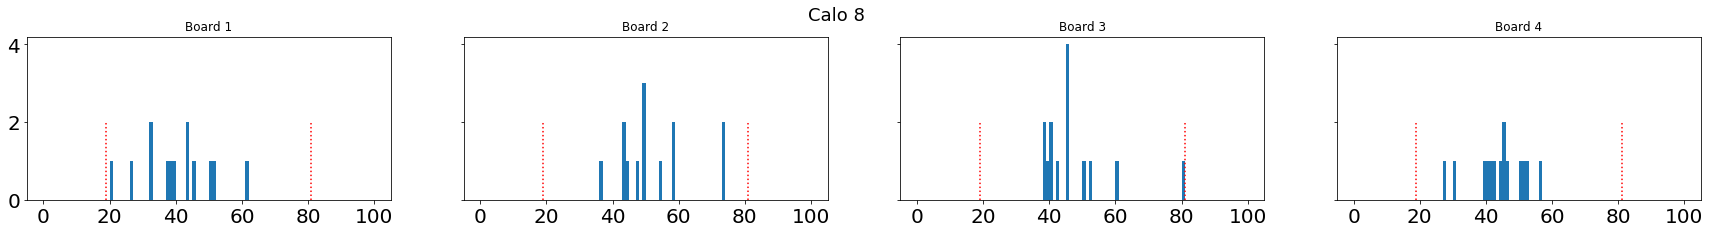

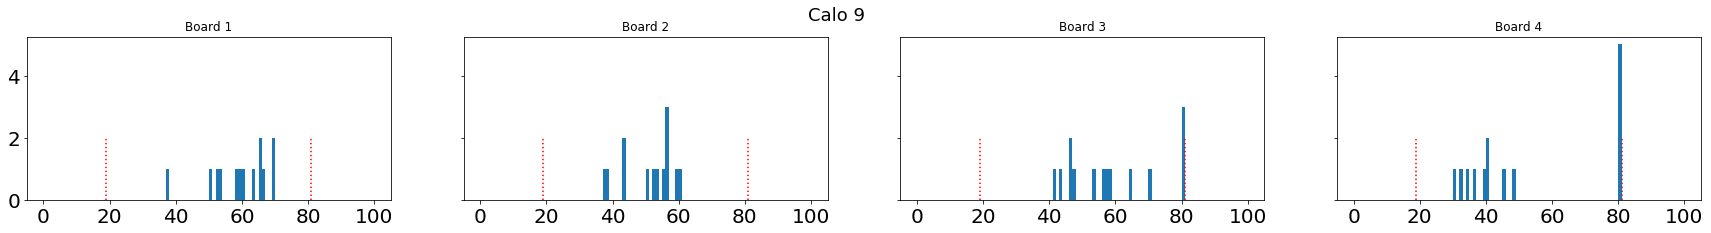

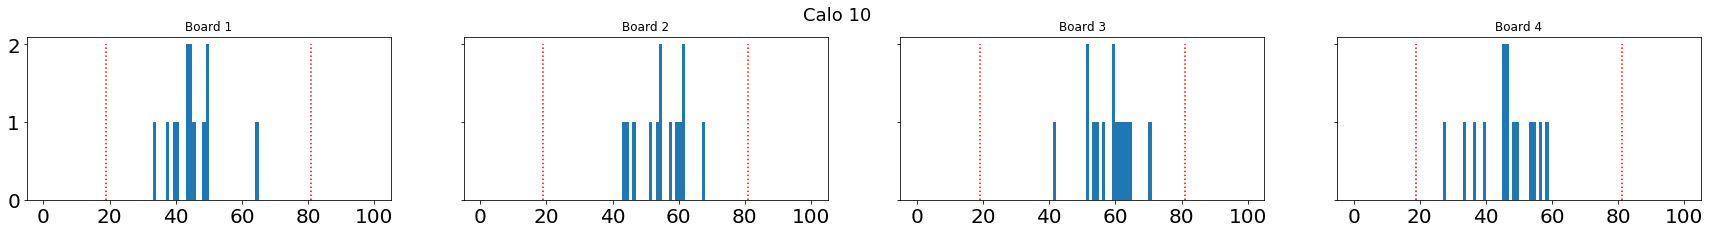

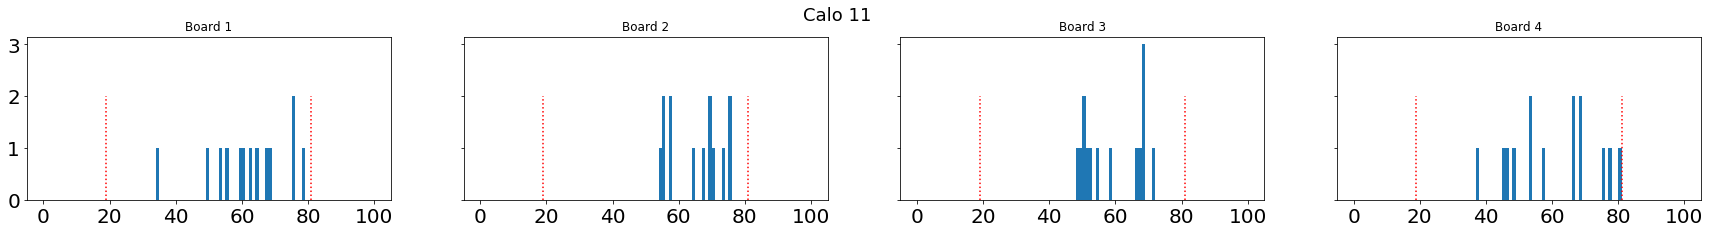

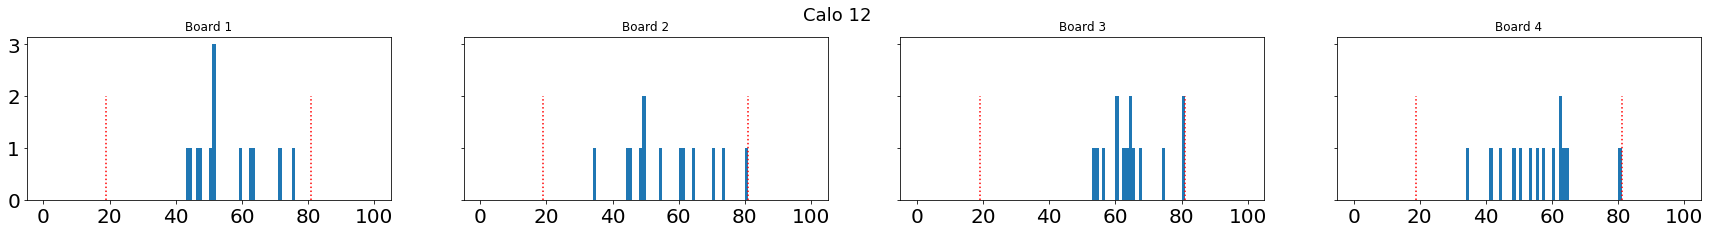

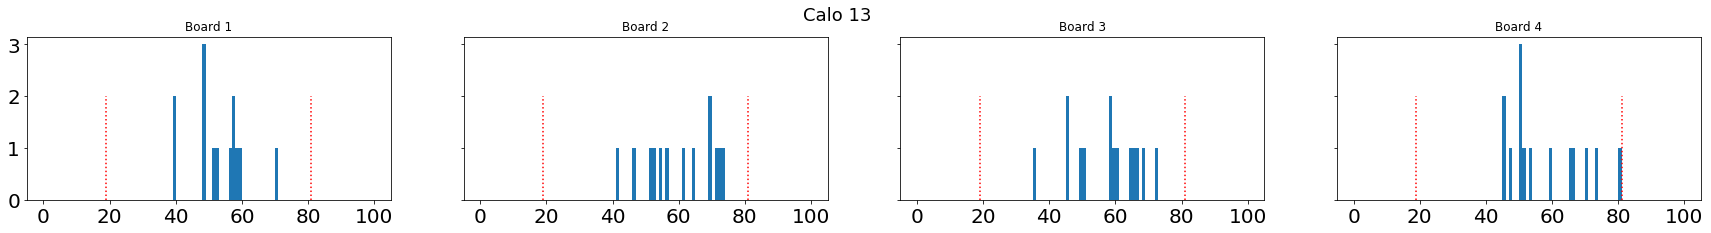

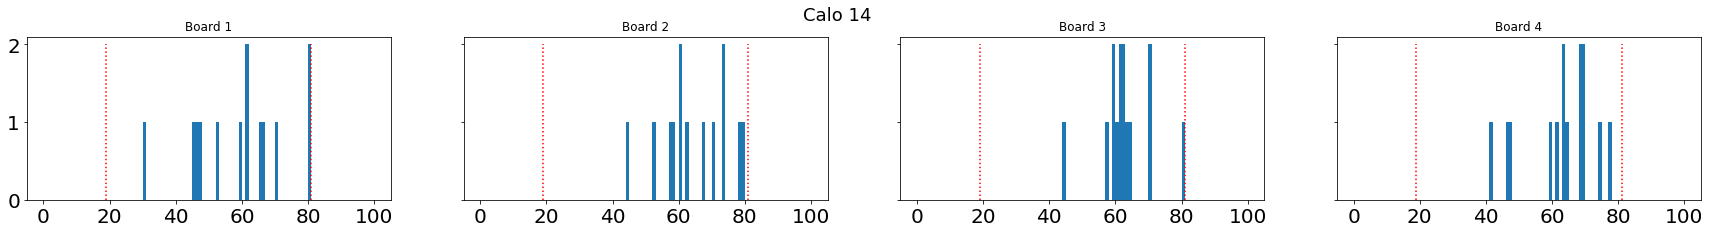

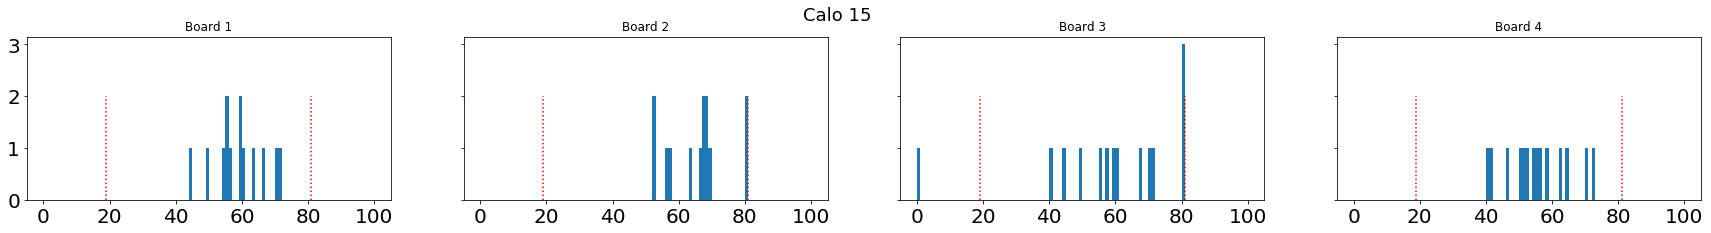

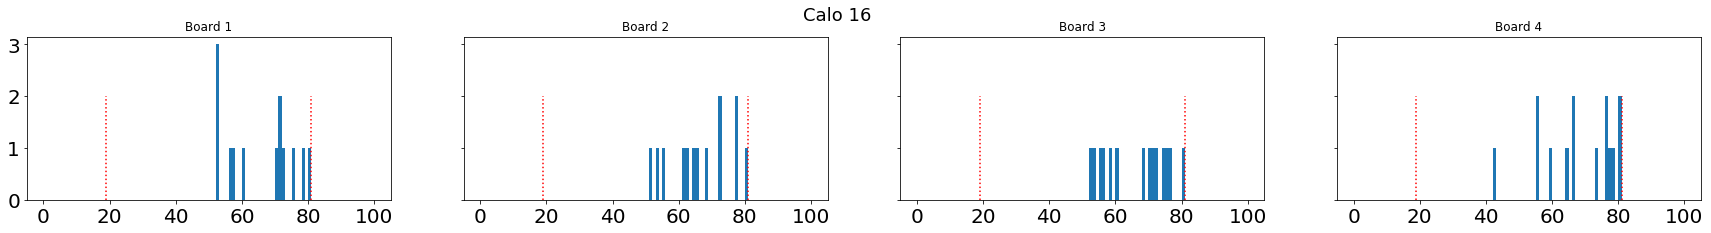

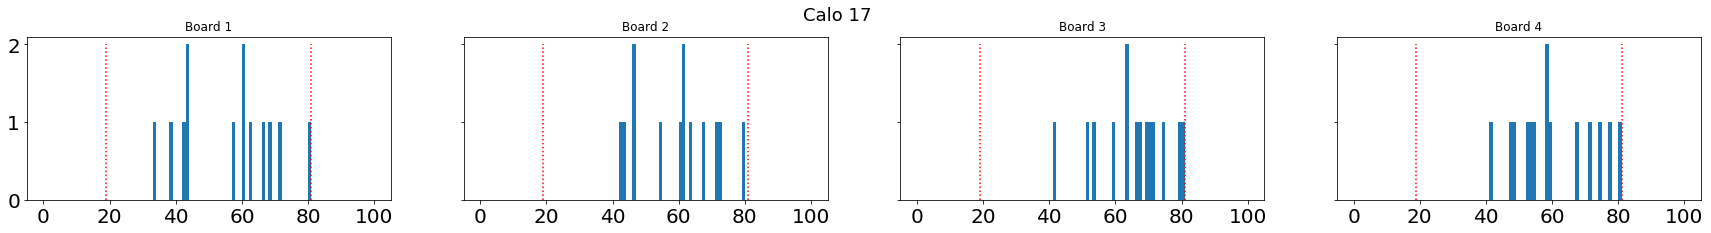

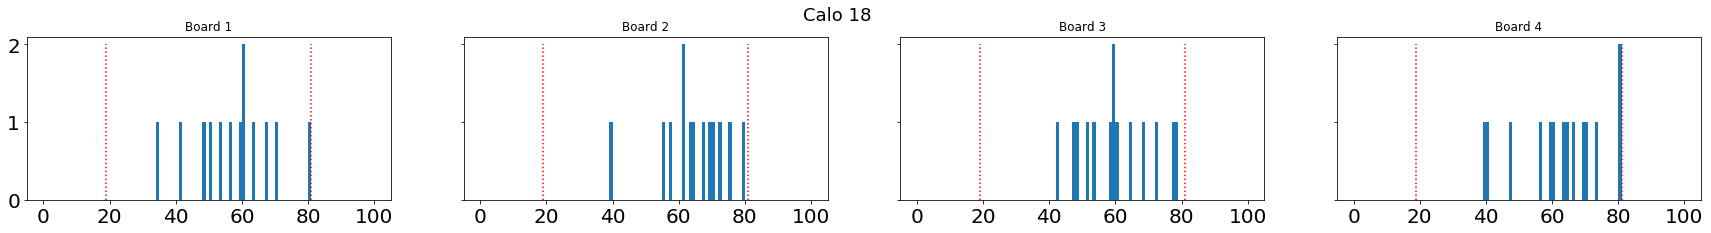

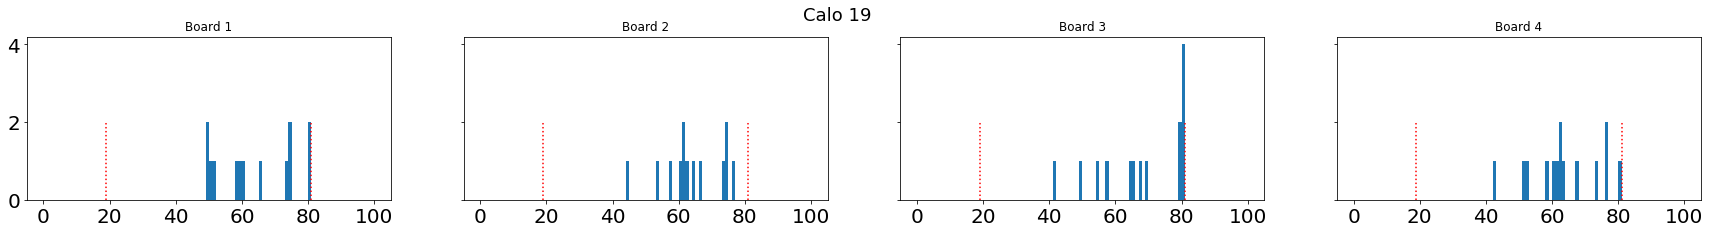

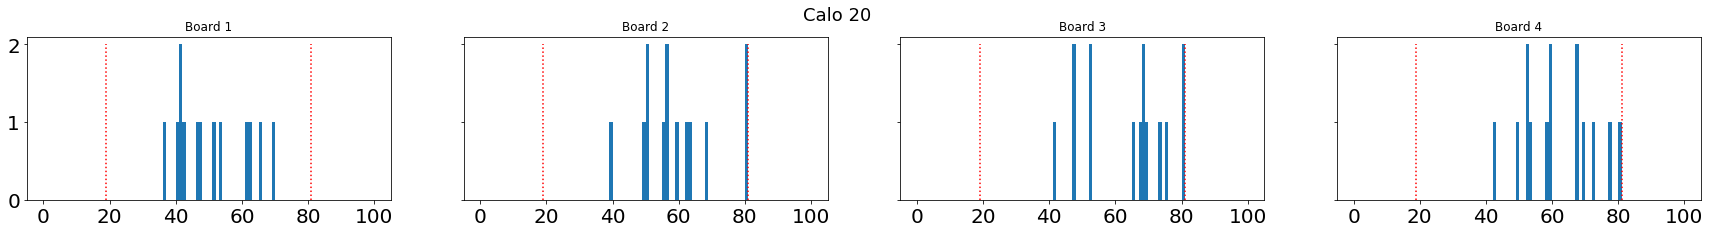

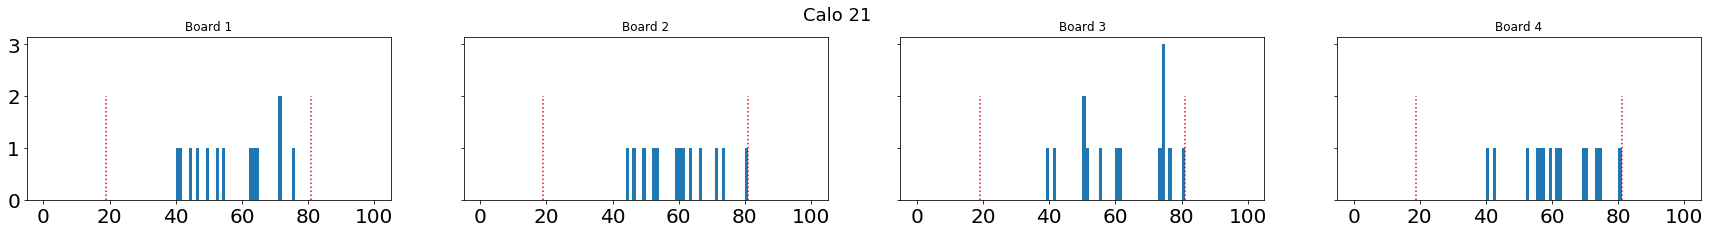

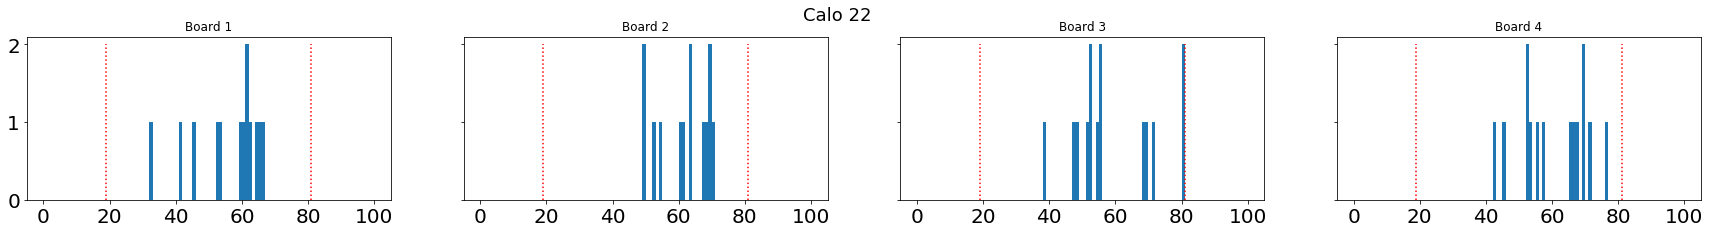

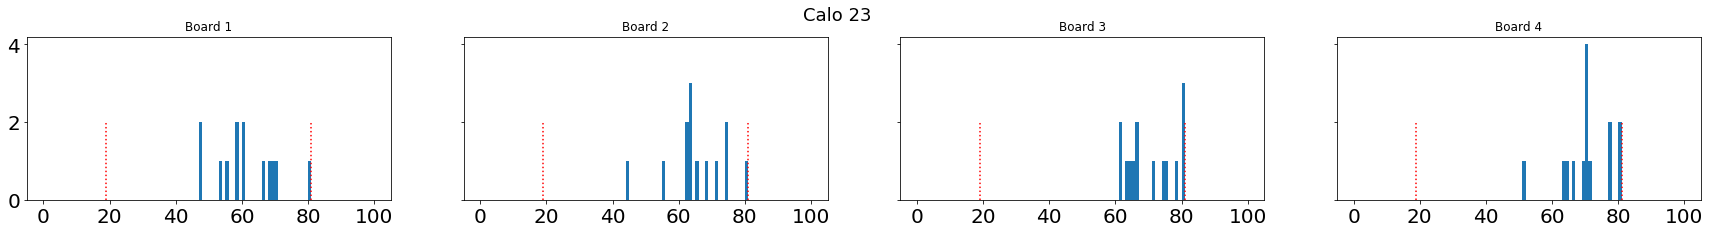

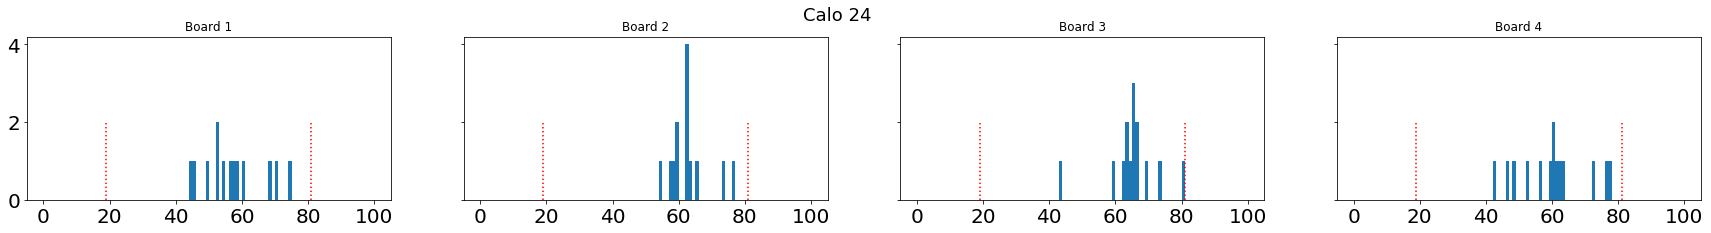

In [31]:
calo = 8
for calo in range(1,25):
    fig,ax = plt.subplots(1,4, figsize=(30,3),sharex=True,sharey=True)
    plt.suptitle("Calo "+str(calo), y=1.02, fontsize=18)
    for board in range(1,5):
        dfi = df.loc[df["board"] == board].loc[df['calo'] == calo]
        axi = ax[board - 1]
        axi.plot([19,19],[0,2],"r:")
        axi.plot([81,81],[0,2],"r:")
        axi.hist(dfi['gain'],bins=100, range=(0,100))
        axi.set_title("Board "+str(board))
    plt.show()